In [3]:
import pandas as pd

In [10]:
df_bookings = pd.read_csv("fact_bookings.csv")
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")
df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")




In [11]:
df_hotels.shape

(25, 4)

In [12]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [13]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [14]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [15]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [16]:
df_agg_bookings.capacity.max()

50.0

In [17]:
df_bookings.describe()  #data cleaning

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [18]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [19]:
df_bookings=df_bookings[df_bookings.no_guests>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [20]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [21]:
avg = df_bookings.revenue_generated.mean()
avg

15378.036937686695

In [22]:
std= df_bookings.revenue_generated.std()
std

93040.1549314641

In [23]:
higher_limit=avg+(3*std)
higher_limit

294498.50173207896

In [24]:
lower_limit=avg-(3*std)
lower_limit

-263742.4278567056

In [25]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [26]:
df_bookings=df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [27]:
higher_limit=df_bookings.revenue_realized.mean()+3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [28]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [29]:
#data transformation


In [30]:
df_agg_bookings.head(3)


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [31]:
df_agg_bookings["occ-pct"]=df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [32]:
df_agg_bookings["occ-pct"]= df_agg_bookings["occ-pct"].apply(lambda x: round(x*100,2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


What is the average occupancy rate in each of the room categories?

In [33]:
df_agg_bookings.groupby("room_category")["occ-pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ-pct, dtype: float64

In [34]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [35]:
df=pd.merge(df_agg_bookings,df_rooms,left_on="room_category",right_on="room_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [36]:
df.groupby("room_class")["occ-pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ-pct, dtype: float64

Print average occupancy rate per city

In [37]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [38]:
df=pd.merge(df,df_hotels,on="property_id")
df.head(4)


,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard,Atliq Grands,Luxury,Mumbai


In [39]:
df.groupby("city")["occ-pct"].mean()

city
Bangalore    56.594207
Delhi        61.606467
Hyderabad    58.144651
Mumbai       57.936305
Name: occ-pct, dtype: float64

When was the occupancy better?Weekday or Weekend

In [40]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore


In [41]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [42]:
df=pd.merge(df,df_date,left_on="check_in_date",right_on="date")
df.head(4)


,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,RT3,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,RT1,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,RT1,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday


In [43]:
df.groupby("day_type")["occ-pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ-pct, dtype: float64

**In the month of June,what is the occupancy for different cities**

In [44]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [49]:
df_june22=df[df["mmm yy"]=="Jun 22"]
df_june22

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,RT1,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,RT1,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,17562,30-Jun-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Bay,Luxury,Mumbai,30-Jun-22,Jun 22,W 27,weekeday
4296,19563,30-Jun-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Palace,Business,Bangalore,30-Jun-22,Jun 22,W 27,weekeday
4297,16560,30-Jun-22,RT4,3,7.0,42.86,RT4,Presidential,Atliq City,Business,Delhi,30-Jun-22,Jun 22,W 27,weekeday
4298,19558,30-Jun-22,RT4,3,7.0,42.86,RT4,Presidential,Atliq Grands,Luxury,Bangalore,30-Jun-22,Jun 22,W 27,weekeday


In [54]:
df_june22.groupby("city")["occ-pct"].mean().sort_values(ascending=False)

city
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Bangalore    56.578552
Name: occ-pct, dtype: float64

*Add august data**


In [58]:
df_august= pd.read_csv("new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [60]:
latest_df=pd.concat([df,df_august],ignore_index=True,axis=0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6497,17558,31-Jul-22,RT4,3,6.0,50.0,RT4,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6498,19563,31-Jul-22,RT4,3,6.0,50.0,RT4,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6499,17561,31-Jul-22,RT4,3,4.0,75.0,RT4,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6500,16559,01-Aug-22,RT1,30,30.0,NaN,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,01-Aug-22,RT1,21,30.0,NaN,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6502,19563,01-Aug-22,RT1,23,30.0,NaN,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


**Print revenue realized per city**

In [62]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [63]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [64]:
df_bookings_all=pd.merge(df_bookings,df_hotels,on="property_id")
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [67]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**Print month by month revenue**

In [68]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [70]:
df_date["date"]=pd.to_datetime(df_date["date"])
df_date.head(3)

C:\Users\pathi\AppData\Local\Temp\ipykernel_13380\1847724004.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]=pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [76]:
df_bookings_all['check_in_date'] = pd.to_datetime(df_bookings_all['check_in_date'], dayfirst=True, errors='coerce')

# Convert remaining NaT values assuming month-first format
df_bookings_all['check_in_date'] = df_bookings_all['check_in_date'].fillna(
    pd.to_datetime(df_bookings_all['check_in_date'], dayfirst=False, errors='coerce')
)

# Display the first few rows to verify the conversion
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [78]:
df=pd.merge(df_bookings_all,df_date,left_on="check_in_date",right_on="date")
df.head(6)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
5,May012216558RT19,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [79]:
df.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    243180932
Jun 22    229637640
May 22    234353183
Name: revenue_realized, dtype: int64

**Print revenue realized per hotel type**

In [80]:
df.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [81]:
df.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        107516312
Atliq Blu        108108129
Atliq City       118290783
Atliq Exotica    133619226
Atliq Grands      87245939
Atliq Palace     125553143
Atliq Seasons     26838223
Name: revenue_realized, dtype: int64

**Print average rating per city**

In [82]:
df.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.79
Hyderabad    3.65
Mumbai       3.66
Name: ratings_given, dtype: float64

In [ ]:
**Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

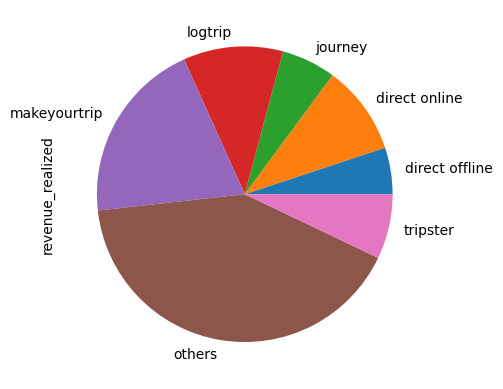

In [83]:
df.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")